In [ ]:
 import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
X_test[1]
y_train[1]

array([9], dtype=uint8)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape


(50000, 1)

In [ ]:
y_train[:5]
print(type(y_train))

<class 'numpy.ndarray'>


our y_train is 2D ,for our classification 1D array is better.

In [ ]:
y_train = y_train.reshape(-1,)


In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
# for show xlabel we need this list 
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


plot some images to see what they are


In [ ]:
def plot_s(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


TypeError: ignored

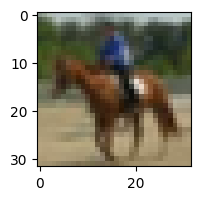

In [ ]:
plot_s(X_train, y_train, 551)


TypeError: ignored

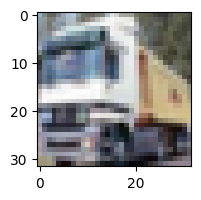

In [ ]:
plot_s(X_train, y_train, 1)


##Normalizing the data

In [ ]:
X_test[0]

array([[[158., 112.,  49.],
        [159., 111.,  47.],
        [165., 116.,  51.],
        ...,
        [137.,  95.,  36.],
        [126.,  91.,  36.],
        [116.,  85.,  33.]],

       [[152., 112.,  51.],
        [151., 110.,  40.],
        [159., 114.,  45.],
        ...,
        [136.,  95.,  31.],
        [125.,  91.,  32.],
        [119.,  88.,  34.]],

       [[151., 110.,  47.],
        [151., 109.,  33.],
        [158., 111.,  36.],
        ...,
        [139.,  98.,  34.],
        [130.,  95.,  34.],
        [120.,  89.,  33.]],

       ...,

       [[ 68., 124., 177.],
        [ 42., 100., 148.],
        [ 31.,  88., 137.],
        ...,
        [ 38.,  97., 146.],
        [ 13.,  64., 108.],
        [ 40.,  85., 127.]],

       [[ 61., 116., 168.],
        [ 49., 102., 148.],
        [ 35.,  85., 132.],
        ...,
        [ 26.,  82., 130.],
        [ 29.,  82., 126.],
        [ 20.,  64., 107.]],

       [[ 54., 107., 160.],
        [ 56., 105., 149.],
        [ 45.,  

In [ ]:
X_train = X_train / 255.0
X_test = X_test/ 255.0

In [ ]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

***Build artificial neural network for image classification***



In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])


In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
ann.fit(X_train, y_train, epochs=1)


1563/1563 [==============================] - 166s 106ms/step - loss: 2.2997 - accuracy: 0.1295


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 11s 33ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.16      0.00      0.01      1000
           3       0.15      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.11      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.10      0.90      0.18      1000
           9       0.24      0.25      0.25      1000

    accuracy                           0.12     10000
   macro avg       0.08      0.12      0.04     10000
weighted avg       0.08      0.12      0.04     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=26, kernel_size=(2, 2), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 2.2440 - accuracy: 0.1474
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 2.0597 - accuracy: 0.2518
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.9951 - accuracy: 0.2806
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.9474 - accuracy: 0.2971
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.9179 - accuracy: 0.3083
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.8913 - accuracy: 0.3192
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.8694 - accuracy: 0.3279
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.8510 - accuracy: 0.3335
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.8360 - accuracy: 0.3394
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 65s 15ms/step - loss: 427.5314 - accuracy: 0.1750


[427.5314025878906, 0.17499999701976776]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]
